In [37]:
import pandas as pd
import numpy as np
df = pd.read_csv('data.csv')

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9486 entries, 0 to 9485
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           9486 non-null   object 
 1   country_code      9180 non-null   object 
 2   continent         9486 non-null   object 
 3   population        9486 non-null   int64  
 4   indicator         9486 non-null   object 
 5   weekly_count      9078 non-null   float64
 6   year_week         9486 non-null   object 
 7   rate_14_day       8997 non-null   float64
 8   cumulative_count  9078 non-null   float64
 9   source            9486 non-null   object 
 10  note              0 non-null      float64
dtypes: float64(4), int64(1), object(6)
memory usage: 815.3+ KB


In [39]:
df.head()
df.tail()

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
9481,Sweden,SWE,Europe,10379295,deaths,77.0,2022-44,15.607996,20852.0,TESSy COVID-19,NaN
9482,Sweden,SWE,Europe,10379295,deaths,84.0,2022-45,15.511651,20936.0,TESSy COVID-19,NaN
9483,Sweden,SWE,Europe,10379295,deaths,87.0,2022-46,16.475107,21023.0,TESSy COVID-19,NaN
9484,Sweden,SWE,Europe,10379295,deaths,64.0,2022-47,14.548194,21087.0,TESSy COVID-19,NaN
9485,Sweden,SWE,Europe,10379295,deaths,11.0,2022-48,7.225924,21098.0,TESSy COVID-19,NaN


In [40]:
df.sample(n=10)

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
8875,Spain,ESP,Europe,47398695,cases,NaN,2020-02,NaN,NaN,TESSy COVID-19,NaN
4204,Hungary,HUN,Europe,9730772,deaths,120.0,2021-21,35.146235,28589.0,TESSy COVID-19,NaN
1881,Denmark,DNK,Europe,5840045,cases,7542.0,2020-46,218.166127,59327.0,TESSy COVID-19,NaN
5161,Italy,ITA,Europe,59236213,deaths,1510.0,2022-08,57.296033,157689.0,TESSy COVID-19,NaN
4598,Ireland,IRL,Europe,5006324,cases,0.0,2020-09,0.000000,0.0,TESSy COVID-19,NaN
7330,Norway,NOR,Europe,5391369,deaths,0.0,2022-35,0.000000,2030.0,TESSy COVID-19,NaN
5363,Latvia,LVA,Europe,1893223,deaths,0.0,2020-09,0.000000,0.0,TESSy COVID-19,NaN
7571,Poland,POL,Europe,37840001,deaths,418.0,2021-22,32.610993,74466.0,TESSy COVID-19,NaN
7890,Portugal,PRT,Europe,10298252,deaths,80.0,2021-35,15.827929,17796.0,TESSy COVID-19,NaN
2013,Denmark,DNK,Europe,5840045,deaths,4.0,2020-25,1.712316,611.0,TESSy COVID-19,NaN


In [41]:
df['country'].value_counts()

Austria           306
Italy             306
Spain             306
Slovenia          306
Slovakia          306
Romania           306
Portugal          306
Poland            306
Norway            306
Netherlands       306
Malta             306
Luxembourg        306
Lithuania         306
Liechtenstein     306
Latvia            306
Ireland           306
Belgium           306
Iceland           306
Hungary           306
Greece            306
Germany           306
France            306
Finland           306
EU/EEA (total)    306
Estonia           306
Denmark           306
Czechia           306
Cyprus            306
Croatia           306
Bulgaria          306
Sweden            306
Name: country, dtype: int64

In [47]:
df['indicator'].value_counts()

cases     4743
deaths    4743
Name: indicator, dtype: int64

In [48]:
#Cases overall
lastWeek = df.loc[df['year_week']=='2022-47'].loc[df['indicator']=='cases']
lastWeek = lastWeek.loc[lastWeek.country != 'EU/EEA (total)']
lastWeek

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
151,Austria,AUT,Europe,8932664,cases,30240.0,2022-47,641.062957,5553569.0,TESSy COVID-19,NaN
457,Belgium,BEL,Europe,11554767,cases,6746.0,2022-47,104.000366,4629783.0,TESSy COVID-19,NaN
763,Bulgaria,BGR,Europe,6916548,cases,1341.0,2022-47,43.995936,1275928.0,TESSy COVID-19,NaN
1069,Croatia,HRV,Europe,4036355,cases,2496.0,2022-47,135.468758,1366727.0,TESSy COVID-19,NaN
1375,Cyprus,CYP,Europe,896007,cases,4061.0,2022-47,871.868189,604652.0,TESSy COVID-19,NaN
1681,Czechia,CZE,Europe,10701777,cases,4855.0,2022-47,83.986052,4550865.0,TESSy COVID-19,NaN
1987,Denmark,DNK,Europe,5840045,cases,4543.0,2022-47,142.584518,3021693.0,TESSy COVID-19,NaN
2293,Estonia,EST,Europe,1330068,cases,474.0,2022-47,72.552682,591557.0,TESSy COVID-19,NaN
2905,Finland,FIN,Europe,5533793,cases,10332.0,2022-47,386.245022,1402591.0,TESSy COVID-19,NaN
3211,France,FRA,Europe,67656682,cases,295646.0,2022-47,767.805906,37711079.0,TESSy COVID-19,NaN


In [49]:
import plotly.express as px
fig = px.pie(lastWeek['country'], values=lastWeek['cumulative_count'], names=lastWeek['country'].unique(), title='Cumulative Count of Covid Cases')
fig.show()

In [50]:
#Deaths overall
lastWeek = df.loc[df['year_week']=='2022-47'].loc[df['indicator']=='deaths']
lastWeek = lastWeek.loc[lastWeek.country != 'EU/EEA (total)']
fig = px.pie(lastWeek['country'], values=lastWeek['cumulative_count'], names=lastWeek['country'].unique(), title='Cumulative Count of Covid Deaths')
fig.show()

In [51]:
#Cases per Pop
lastWeek = df.loc[df['year_week']=='2022-47'].loc[df['indicator']=='cases']
lastWeek['Cases/Pop'] = df.apply(lambda row: row.cumulative_count / row.population, axis=1)
lastWeek

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note,Cases/Pop
151,Austria,AUT,Europe,8932664,cases,30240.0,2022-47,641.062957,5553569.0,TESSy COVID-19,NaN,0.621715
457,Belgium,BEL,Europe,11554767,cases,6746.0,2022-47,104.000366,4629783.0,TESSy COVID-19,NaN,0.400682
763,Bulgaria,BGR,Europe,6916548,cases,1341.0,2022-47,43.995936,1275928.0,TESSy COVID-19,NaN,0.184475
1069,Croatia,HRV,Europe,4036355,cases,2496.0,2022-47,135.468758,1366727.0,TESSy COVID-19,NaN,0.338604
1375,Cyprus,CYP,Europe,896007,cases,4061.0,2022-47,871.868189,604652.0,TESSy COVID-19,NaN,0.674830
1681,Czechia,CZE,Europe,10701777,cases,4855.0,2022-47,83.986052,4550865.0,TESSy COVID-19,NaN,0.425244
1987,Denmark,DNK,Europe,5840045,cases,4543.0,2022-47,142.584518,3021693.0,TESSy COVID-19,NaN,0.517409
2293,Estonia,EST,Europe,1330068,cases,474.0,2022-47,72.552682,591557.0,TESSy COVID-19,NaN,0.444757
2599,EU/EEA (total),NaN,Europe,453006705,cases,778617.0,2022-47,342.903092,178661567.0,TESSy COVID-19,NaN,0.394391
2905,Finland,FIN,Europe,5533793,cases,10332.0,2022-47,386.245022,1402591.0,TESSy COVID-19,NaN,0.253459


In [52]:
fig = px.bar(lastWeek, x='country', y='Cases/Pop')
fig.show()

In [53]:
lastWeek = df.loc[df['year_week']=='2022-47'].loc[df['indicator']=='deaths']
lastWeek['Deaths/Pop'] = df.apply(lambda row: row.cumulative_count / row.population, axis=1)
fig = px.bar(lastWeek, x='country', y='Deaths/Pop')
fig.show()

In [54]:
lastWeek

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note,Deaths/Pop
304,Austria,AUT,Europe,8932664,deaths,39.0,2022-47,10.187330,21273.0,TESSy COVID-19,NaN,0.002381
610,Belgium,BEL,Europe,11554767,deaths,29.0,2022-47,4.933029,32489.0,TESSy COVID-19,NaN,0.002812
916,Bulgaria,BGR,Europe,6916548,deaths,30.0,2022-47,10.698979,37973.0,TESSy COVID-19,NaN,0.005490
1222,Croatia,HRV,Europe,4036355,deaths,35.0,2022-47,18.581121,4785.0,TESSy COVID-19,NaN,0.001185
1528,Cyprus,CYP,Europe,896007,deaths,9.0,2022-47,23.437317,1553.0,TESSy COVID-19,NaN,0.001733
1834,Czechia,CZE,Europe,10701777,deaths,42.0,2022-47,7.101624,41876.0,TESSy COVID-19,NaN,0.003913
2140,Denmark,DNK,Europe,5840045,deaths,16.0,2022-47,5.821873,7549.0,TESSy COVID-19,NaN,0.001293
2446,Estonia,EST,Europe,1330068,deaths,9.0,2022-47,13.533143,2663.0,TESSy COVID-19,NaN,0.002002
2752,EU/EEA (total),NaN,Europe,447246544,deaths,1779.0,2022-47,9.086711,1182773.0,TESSy COVID-19,NaN,0.002645
3058,Finland,FIN,Europe,5533793,deaths,54.0,2022-47,36.683700,7470.0,TESSy COVID-19,NaN,0.001350


In [78]:
dfEu = df.loc[df.country == 'Spain'].loc[df['indicator']=='cases']
dfEu

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
8874,Spain,ESP,Europe,47398695,cases,NaN,2020-01,NaN,NaN,TESSy COVID-19,NaN
8875,Spain,ESP,Europe,47398695,cases,NaN,2020-02,NaN,NaN,TESSy COVID-19,NaN
8876,Spain,ESP,Europe,47398695,cases,2.0,2020-03,NaN,2.0,TESSy COVID-19,NaN
8877,Spain,ESP,Europe,47398695,cases,1.0,2020-04,0.006329,3.0,TESSy COVID-19,NaN
8878,Spain,ESP,Europe,47398695,cases,2.0,2020-05,0.006329,5.0,TESSy COVID-19,NaN
...,...,...,...,...,...,...,...,...,...,...,...
9022,Spain,ESP,Europe,47398695,cases,18232.0,2022-44,80.839778,13607350.0,TESSy COVID-19,NaN
9023,Spain,ESP,Europe,47398695,cases,20090.0,2022-45,80.850327,13627440.0,TESSy COVID-19,NaN
9024,Spain,ESP,Europe,47398695,cases,21571.0,2022-46,87.894825,13649011.0,TESSy COVID-19,NaN
9025,Spain,ESP,Europe,47398695,cases,19207.0,2022-47,86.031904,13668218.0,TESSy COVID-19,NaN


In [79]:
fig = px.line(dfEu, x='year_week', y='weekly_count')
#fig = px.line(dfEu.loc[df['indicator']=='deaths'], x='year_week', y='weekly_count')
fig.show()

In [108]:
euCases = df.loc[df['country']=='EU/EEA (total)'].loc[df['indicator']=='cases']
euDeaths = df.loc[df['country']=='EU/EEA (total)'].loc[df['indicator']=='deaths']
#germanyCases = df.loc[df['country']=='Germany'].loc[df['indicator']=='cases']
#germanyDeaths = df.loc[df['country']=='Germany'].loc[df['indicator']=='deaths']
#italyCases = df.loc[df['country']=='Italy'].loc[df['indicator']=='cases']
#italyDeaths = df.loc[df['country']=='Italy'].loc[df['indicator']=='deaths']
euCases

,country,country_code,continent,population,indicator,weekly_count,year_week,rate_14_day,cumulative_count,source,note
2448,EU/EEA (total),NaN,Europe,112268708,cases,11.0,2020-01,NaN,11.0,TESSy COVID-19,NaN
2449,EU/EEA (total),NaN,Europe,29113677,cases,12.0,2020-02,0.079001,23.0,TESSy COVID-19,NaN
2450,EU/EEA (total),NaN,Europe,76512372,cases,10.0,2020-03,0.028754,33.0,TESSy COVID-19,NaN
2451,EU/EEA (total),NaN,Europe,227324085,cases,20.0,2020-04,0.013197,53.0,TESSy COVID-19,NaN
2452,EU/EEA (total),NaN,Europe,313144994,cases,32.0,2020-05,0.016606,85.0,TESSy COVID-19,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2596,EU/EEA (total),NaN,Europe,453006705,cases,739346.0,2022-44,382.637162,176408174.0,TESSy COVID-19,NaN
2597,EU/EEA (total),NaN,Europe,453006705,cases,700019.0,2022-45,317.735915,177108193.0,TESSy COVID-19,NaN
2598,EU/EEA (total),NaN,Europe,453006705,cases,774757.0,2022-46,325.552797,177882950.0,TESSy COVID-19,NaN
2599,EU/EEA (total),NaN,Europe,453006705,cases,778617.0,2022-47,342.903092,178661567.0,TESSy COVID-19,NaN


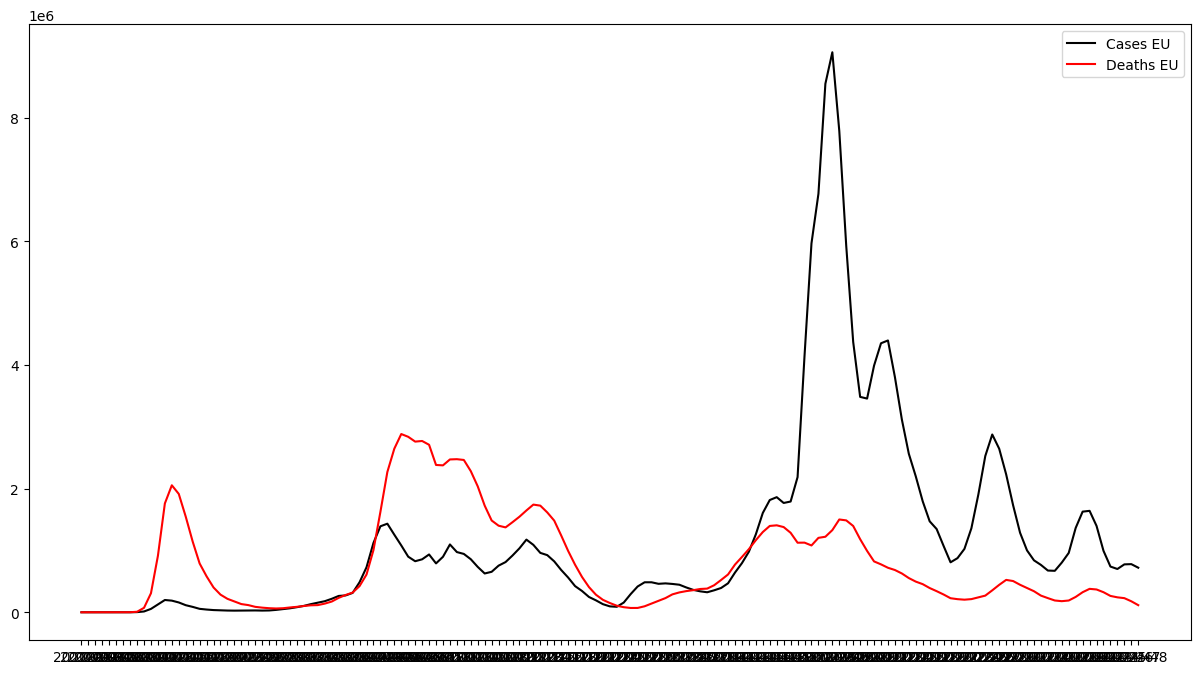

In [109]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
euDeaths['weekly_count'] = euDeaths['weekly_count']*100
ax.plot(euCases['year_week'], euCases['weekly_count'], label='Cases EU', color='black')
ax.plot(euDeaths['year_week'], euDeaths['weekly_count'], label='Deaths EU', color='red')
ax.legend()

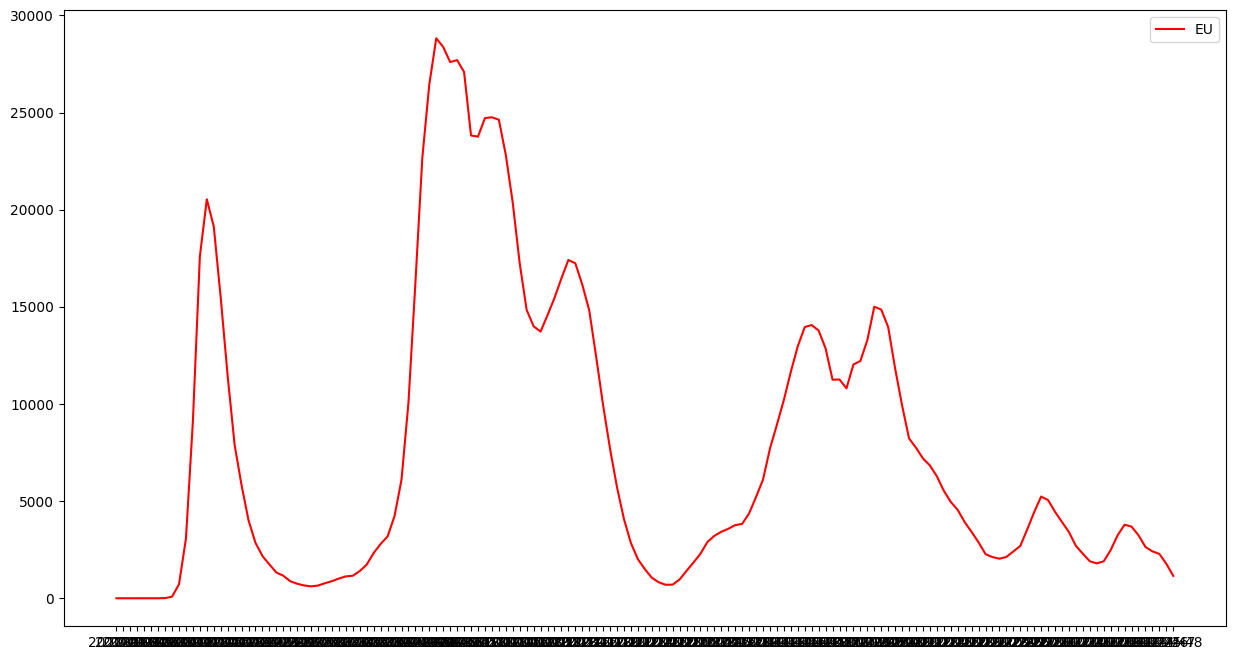

In [97]:
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(euDeaths['year_week'], euDeaths['weekly_count'], label='EU', color='red')
ax.legend()

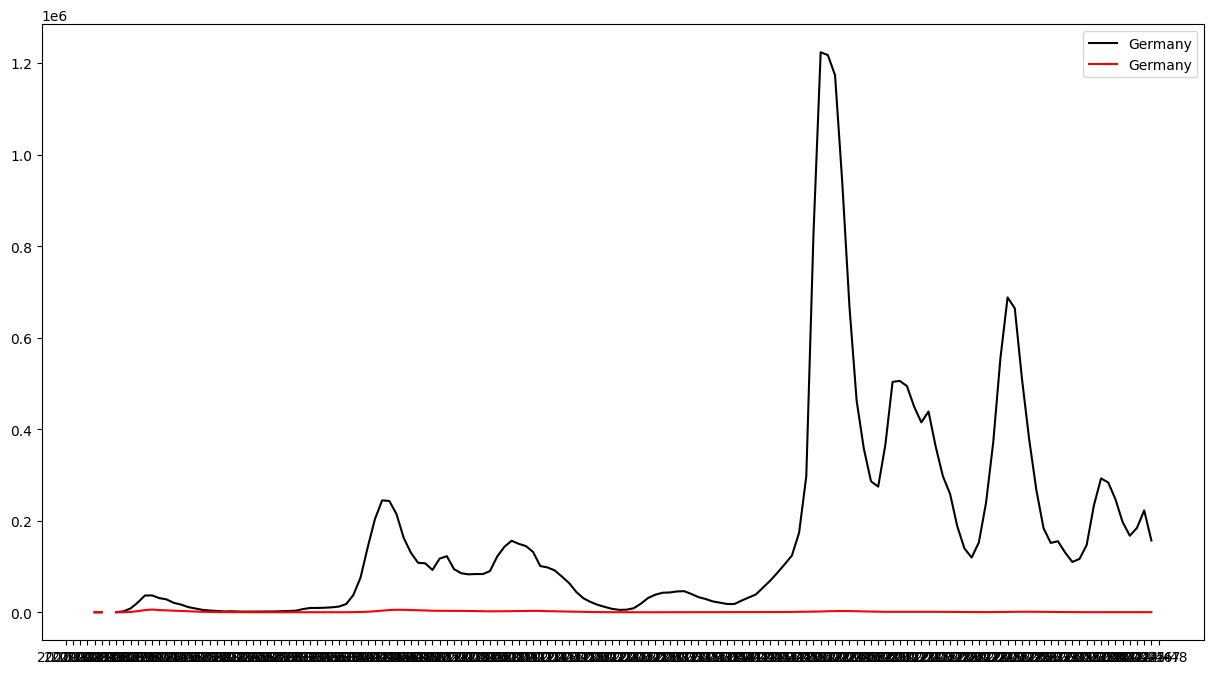

In [81]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(15,8))
#ax.plot(df.loc[df['country']=='Portugal','year_week'], df.loc[df['country']=='Portugal','weekly_count'], label='Portugal', color='yellow')
#ax.plot(df.loc[df['country']=='Sweden','year_week'], df.loc[df['country']=='Sweden','weekly_count'], label='Sweden', color='green')
ax.plot(germanyCasesCases['year_week'], germanyCasesCases['weekly_count'], label='Germany', color='black')
ax.plot(italyDeaths['year_week'], italyDeaths['weekly_count'], label='Germany', color='red')
ax.legend()

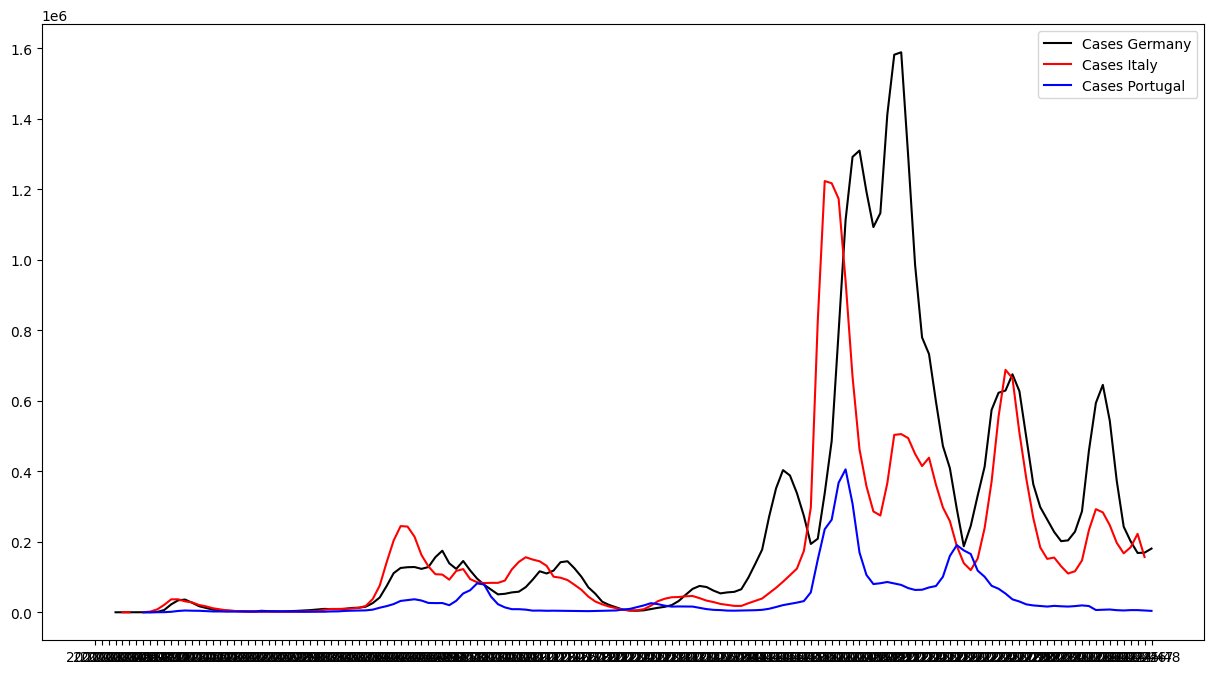

In [110]:
germanyCases = df.loc[df['country']=='Germany'].loc[df['indicator']=='cases']
italyCases = df.loc[df['country']=='Italy'].loc[df['indicator']=='cases']
portugalCases = df.loc[df['country']=='Portugal'].loc[df['indicator']=='cases']
fig, ax = plt.subplots(figsize=(15,8))
ax.plot(germanyCases['year_week'], germanyCases['weekly_count'], label='Cases Germany', color='black')
ax.plot(italyCases['year_week'], italyCases['weekly_count'], label='Cases Italy', color='red')
ax.plot(portugalCases['year_week'], portugalCases['weekly_count'], label='Cases Portugal', color='blue')
ax.legend()
